In [1]:
from vcat import ImageCube
import glob

#general settings:
useDIFMAP=True
difmap_path="/usr/local/difmap/uvf_difmap_2.5g/"

Thank you for using VCAT. Have fun with VLBI!
If you are using this package please cite VCAT Team et al. 2025 ....


In [2]:
#Import Multi-Epoch, Multi-Frequency Data as an ImageCube
fits_files=glob.glob("../dataset_example/0235+164/**/*.icn.fits",recursive=True)
uvf_files=glob.glob("../dataset_example/0235+164/**/*.uvf",recursive=True)
stokes_q_files=glob.glob("../dataset_example/0235+164/**/*.qcn.fits",recursive=True)
stokes_u_files=glob.glob("../dataset_example/0235+164/**/*.ucn.fits",recursive=True)

#Import the data as an ImageCube
im_cube=ImageCube().import_files(fits_files=fits_files,
                                 uvf_files=uvf_files,
                                 stokes_q_files=stokes_q_files,
                                 stokes_u_files=stokes_u_files,
                                difmap_path=difmap_path)

#print basic info
print(im_cube)

ImageCube for source 0235+164 with 3 frequencies and 2 epochs.
Frequencies [GHz]: 15 GHz, 24 GHz, 43 GHz
Epochs: 2022-08-01, 2022-08-19


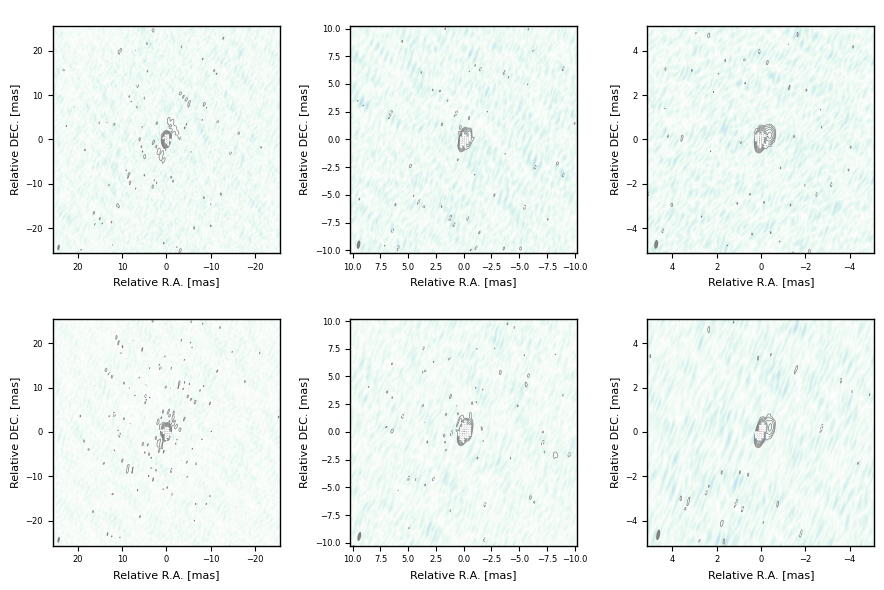

In [3]:
#Create plot of the data
im_cube.plot(plot_mode="lin_pol",plot_evpa=True)

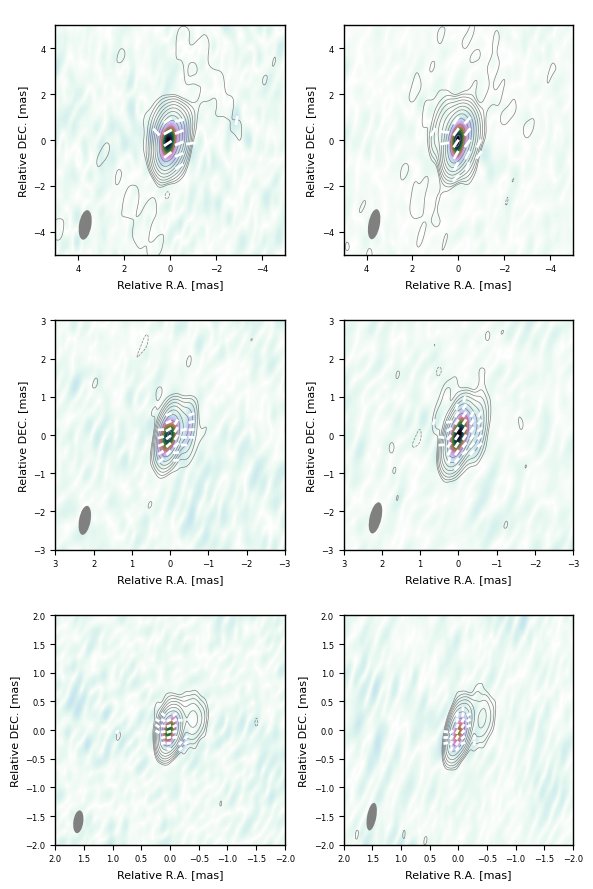

In [4]:
#We can choose to swap the plot axis and have frequency displayed vertically and epochs horizontally
swap_axis=True

#Additionally we have the same options as for the ImageData plot for every image, but also per epoch and frequency
#Let's say we want adjust the plot limits for every frequency separately, this can be done as follows
mode="freq"
xlim=[[5,-5],[3,-3],[2,-2]] #provide xlim for every frequency, ascending order
ylim=[[-5,5],[-3,3],[-2,2]] #provide ylim for every frequency, ascending order

im_cube.plot(swap_axis=True,mode=mode,xlim=xlim,ylim=ylim,plot_mode="lin_pol",plot_evpa=True)

/home/flep98/VCAT/vcat/graph_generator.py:1194: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 1 Axes> than <Figure size 900x600 with 7 Axes> which fig.colorbar is called on.
  cbar = self.fig.colorbar(col[j], ax=self.axes[:, j], orientation="horizontal", fraction=0.05, pad=0.1)
/home/flep98/VCAT/vcat/graph_generator.py:1194: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 1 Axes> than <Figure size 900x600 with 8 Axes> which fig.colorbar is called on.
  cbar = self.fig.colorbar(col[j], ax=self.axes[:, j], orientation="horizontal", fraction=0.05, pad=0.1)
/home/flep98/VCAT/vcat/graph_generator.py:1194: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 1 Axes> than <Figure size 900x600 with 9 Axes> which fig.colorbar is called on.
  cbar = self.fig.colorbar(col[j], ax=self.axes[:, j], orientation="horizontal", fraction=0.05, pad=0.1)


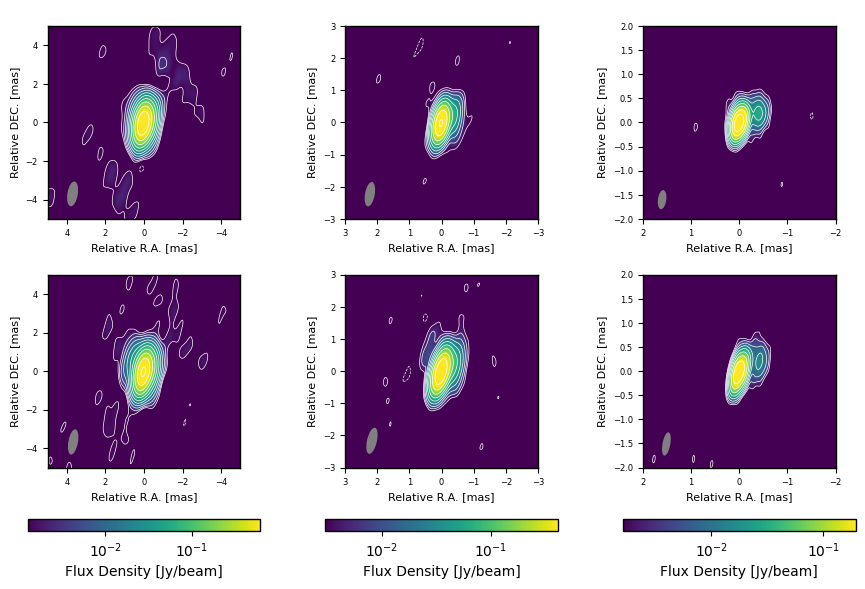

In [5]:
#Currently the colormaps and contours of every image are treated independently, but we can combine them
shared_colormap="freq" #to use the same contours and colormap for every frequeny (other options 'all','epoch')
shared_sigma="max" #to use the maximum noise cut from the combined images (otherwise minimum)

#Additionally, if you want to plot a shared colorbar, this is possible using
shared_colorbar=True

#this effect becomes better visible in total intensity, so we will use
plot_mode="stokes_i"

#and we need to turn on the colormap in general
im_colormap=True
im_color="viridis"

#let's create the plot
im_cube.plot(mode=mode,xlim=xlim,ylim=ylim,plot_mode="stokes_i",im_colormap=im_colormap,im_color=im_color,
             shared_colormap=shared_colormap,shared_sigma=shared_sigma,shared_colorbar=shared_colorbar)

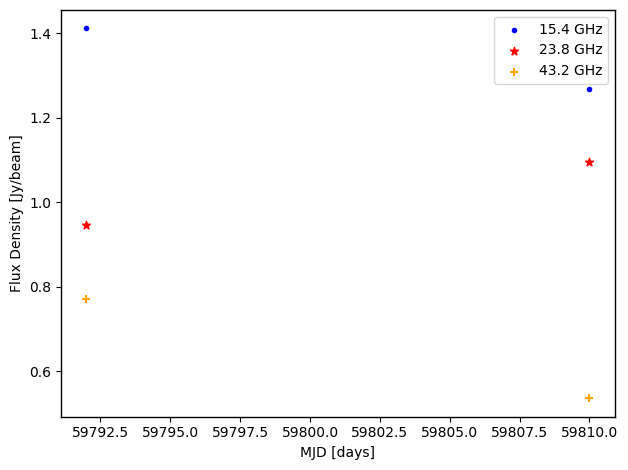

In [6]:
#In addition to plotting images, we can also plot the evolution of given parameters across time and frequencies
#Let's say we want to plot the flux density
values="flux" #additional options are 'linpol','frac_pol', 'evpa', 'noise', 'polnoise'

#additionally, we can specify colors and markers for the different frequencies, ascending
colors=["blue","red","orange"] #color for every frequency
markers=[".","*","+"] #markertype for every frequency

im_cube.plot_evolution("flux",colors=colors,markers=markers)